#  <span style='color:midnightblue'>  Text Analysis </span>

##  <span style='color:tomato'>  1. Install and Load required packages </span>

In [ ]:
install.packages("skimr")
install.packages("tidytext")
install.packages("beepr")
install.packages("textdata")
install.packages("widyr")
install.packages("ggpubr")
install.packages("wordcloud")

In [16]:
library(dplyr)
library(tidytext)
library(textdata)
library(widyr)
library(skimr)
library(beepr)
library(ggpubr)
library(wordcloud)
beep()

Loading required package: RColorBrewer


##  <span style='color:tomato'>  2. Load dataset </span>

In [2]:
happy_df <- read.csv("./happydb.csv", sep = ";")

#  <span style='color:tomato'>  3. Prepare Dataframe and Check for NA </span>

In [3]:
happy_df <- happy_df[,-c(1,4,6,8)]
happy_df$cleaned_hm <- as.character(happy_df$cleaned_hm)
colnames(happy_df) <- c("wid", "reflection_period", "cleaned_hm", "num_sentence", "hm_category")

sapply(happy_df, function(x) sum(is.na(x)))

wid reflection_period        cleaned_hm      num_sentence 
                0                 0                 0                 0 
      hm_category 
                0

#  <span style='color:tomato'>  4. Investigate Variables and Explore Data </span>

In [4]:
head(happy_df,5)

wid,reflection_period,cleaned_hm,num_sentence,hm_category
2053,24h,I went on a successful date with someone I felt sympathy and connection with.,1,affection
2,24h,I was happy when my son got 90% marks in his examination,1,affection
1936,24h,I went to the gym this morning and did yoga.,1,exercise
206,24h,We had a serious talk with some friends of ours who have been flaky lately. They understood and we had a good evening hanging out.,2,bonding
6227,24h,I went with grandchildren to butterfly display at Crohn Conservatory,1,affection


In [5]:
skimr::skim(happy_df)

── Data Summary ────────────────────────
                           Values  
Name                       happy_df
Number of rows             100535  
Number of columns          5       
_______________________            
Column type frequency:             
  character                1       
  factor                   2       
  numeric                  2       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 cleaned_hm            0             1     6  6532     0    96481        365

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate ordered n_unique
1 reflection_period         0             1 FALSE          2
2 hm_category               0             1 FALSE          7
  top_counts                                    
1 3m: 50704

#  <span style='color:tomato'>  5.Tokenization by Word </span>

The output table shows the most common words in the dataset.

In [6]:
happy_df.tidy <- tidytext::unnest_tokens(happy_df, word, cleaned_hm)
head(dplyr::count(happy_df.tidy, word, sort = TRUE),15)

word,n
i,104829
my,74112
a,71707
to,57292
and,56721
the,52562
was,33930
for,27132
in,26448
me,25588


#  <span style='color:tomato'>  6. Remove Stopwords </span>

Removes stopwords, which are frequently used words in sentences (i.e. the, I, my, a, and, etc.)

In [7]:
happy_df.clean <- dplyr::anti_join(happy_df.tidy, tidytext::get_stopwords())

# Joining, by = "word"
head(dplyr::count(happy_df.clean, word, sort = TRUE),15)

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”Joining, by = "word"


word,n
happy,18826
got,13379
made,11435
went,9618
time,9383
new,8871
day,8074
work,7879
last,6399
good,5852


#  <span style='color:tomato'>  7. Compute and Visualize Word Counts </span>

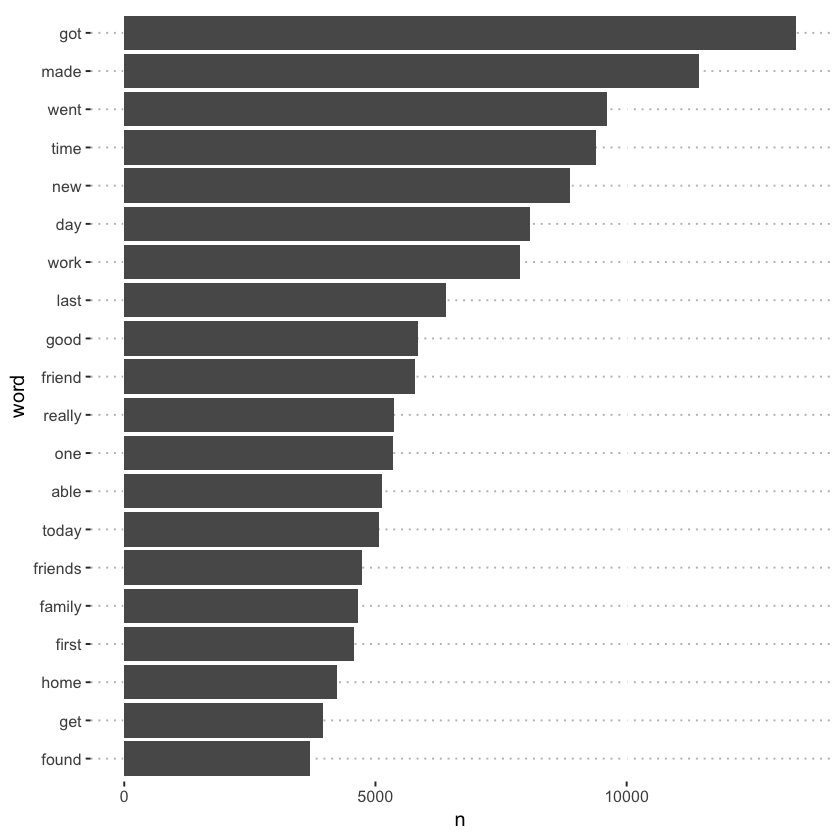

In [8]:
happy_df.count <- dplyr::count(happy_df.clean, word, sort = TRUE) 
happy_df.count <- happy_df.count[which(  happy_df.count$word != "happy" & 
                                         happy_df.count$word != "happiest" ),]
happy_df.count$word <- reorder(happy_df.count$word, happy_df.count$n)
happy_df.count <- head(happy_df.count, 20)

ggplot2::ggplot(happy_df.count, ggplot2::aes(x = word, y = n)) +
  ggplot2::geom_col() +
  ggplot2::coord_flip() +
  ggpubr::theme_pubclean()

#  <span style='color:tomato'>  8. Compute TF-IDF </span>

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

In [12]:
happy_df.count <- dplyr::count(happy_df.clean, wid, word, sort = TRUE) 
happy_df.count <- happy_df.count[which(happy_df.count$n > 10 & 
                                         happy_df.count$word != "happy" & 
                                         happy_df.count$word != "happiest" &
                                         happy_df.count$word != "happiness" &
                                         nchar(happy_df.count$word) > 3),]
head(happy_df.count,15)

,wid,word,n
5,280,life,123
8,120,event,92
9,954,time,91
10,280,good,89
14,40,went,80
16,5,made,79
17,455,time,76
18,40,thank,75
22,954,roti,73
26,55,really,72


In [13]:
head(tidytext::bind_tf_idf(happy_df.count, word, wid, n),15)

,wid,word,n,tf,idf,tf_idf
5,280,life,123,0.37048193,2.453985,0.90915700
8,120,event,92,0.26210826,3.697178,0.96906097
9,954,time,91,0.06412967,1.790108,0.11479903
10,280,good,89,0.26807229,2.644028,0.70879073
14,40,went,80,0.04579279,1.704748,0.07806517
16,5,made,79,0.74528302,1.840880,1.37197680
17,455,time,76,0.02845376,1.790108,0.05093531
18,40,thank,75,0.04293074,6.405228,0.27498119
22,954,roti,73,0.05144468,6.405228,0.32951492
26,55,really,72,0.26966292,2.741667,0.73932588


#  <span style='color:tomato'>  9. Visualize as Word Cloud </span>

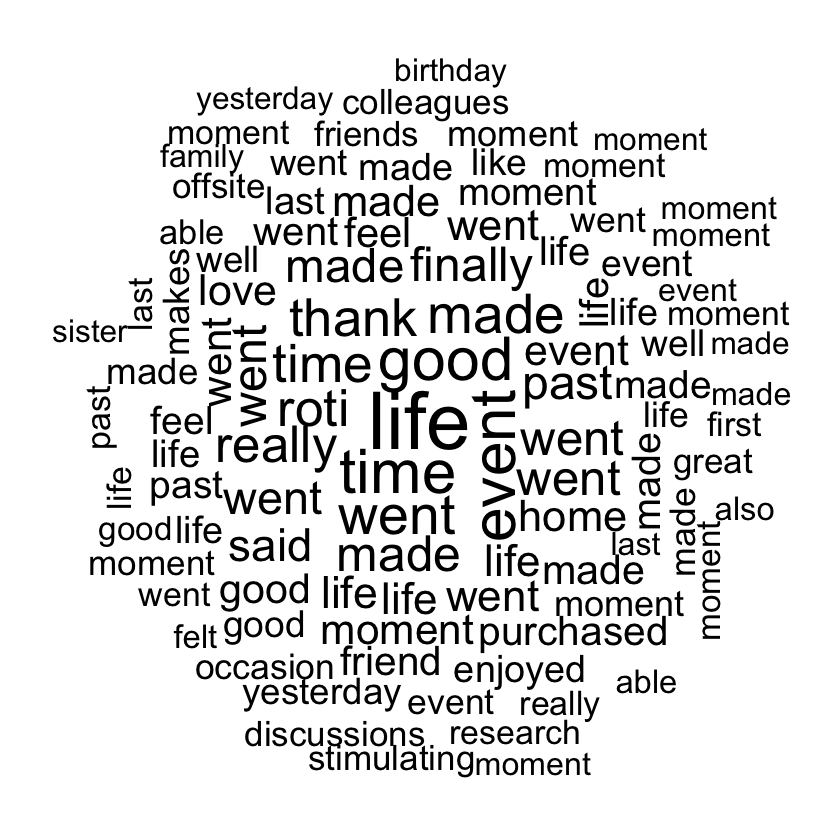

In [17]:
wordcloud::wordcloud(happy_df.count$word, happy_df.count$n, min.freq = 1, max.words = 100, random.order=FALSE)

#  <span style='color:tomato'>  10. Join Sentiment Dictionary and Visualize Sentiment Counts </span>

In [18]:
happy_df.sen <- dplyr::inner_join(happy_df.clean, tidytext::get_sentiments("nrc"), by = "word")
happy_df.sen <- dplyr::inner_join(happy_df.sen, tidytext::get_sentiments("afinn"), by = "word")
head(happy_df.sen, 10)

wid,reflection_period,num_sentence,hm_category,word,sentiment,score
2053,24h,1,affection,successful,anticipation,3
2053,24h,1,affection,successful,joy,3
2053,24h,1,affection,successful,positive,3
2053,24h,1,affection,successful,trust,3
2053,24h,1,affection,sympathy,positive,2
2053,24h,1,affection,sympathy,sadness,2
2,24h,1,affection,happy,anticipation,3
2,24h,1,affection,happy,joy,3
2,24h,1,affection,happy,positive,3
2,24h,1,affection,happy,trust,3


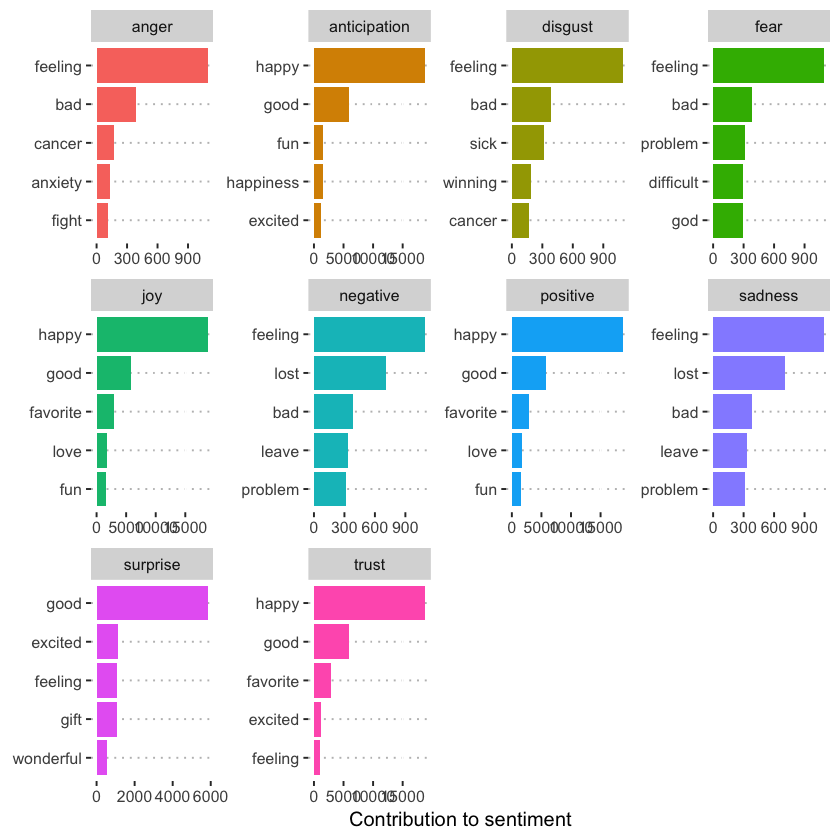

In [19]:
happy_df.sen_count <- count(happy_df.sen, sentiment, word, sort = TRUE)
happy_df.sen_count$word <- reorder(happy_df.sen_count$word, happy_df.sen_count$n)
happy_df.sen_count <- by(happy_df.sen_count, happy_df.sen_count["sentiment"], head, n=5)
happy_df.sen_count <- Reduce(rbind, happy_df.sen_count)

ggplot2::ggplot(happy_df.sen_count, ggplot2::aes(x = word, y = n, fill = sentiment)) +
  ggplot2::geom_col(show.legend = FALSE) +
  ggplot2::facet_wrap(~sentiment, scales = "free") +
  ggplot2::labs(y = "Contribution to sentiment", x = NULL) +
  ggplot2::coord_flip() +
  ggpubr::theme_pubclean()

#  <span style='color:tomato'>  11. Compute and Visualize Count by Reflection Time </span>

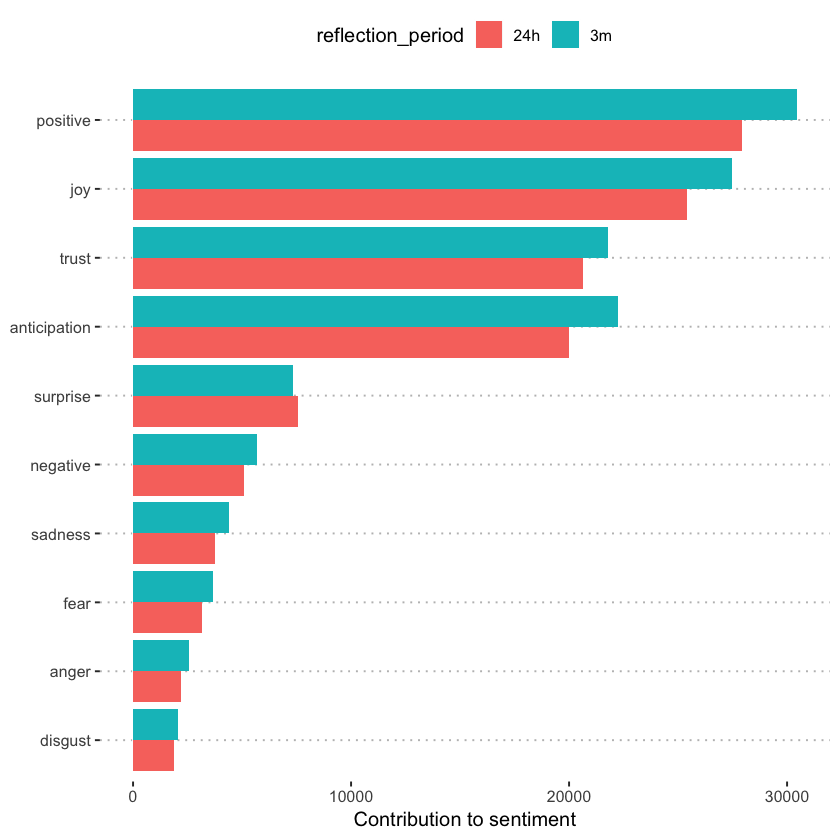

In [20]:
happy_df.sen_count <- dplyr::count(happy_df.sen, reflection_period, sentiment, sort = TRUE)
happy_df.sen_count$sentiment <- reorder(happy_df.sen_count$sentiment, happy_df.sen_count$n)

ggplot2::ggplot(happy_df.sen_count, ggplot2::aes(x = sentiment, y = n, fill = reflection_period)) +
  ggplot2::geom_bar(stat = "identity", position = "dodge") +
  ggplot2::labs(y = "Contribution to sentiment", x = NULL) +
  ggplot2::coord_flip() +
  ggpubr::theme_pubclean()

#  <span style='color:tomato'>  12. Tokenize and Visualize by Sentence </span>

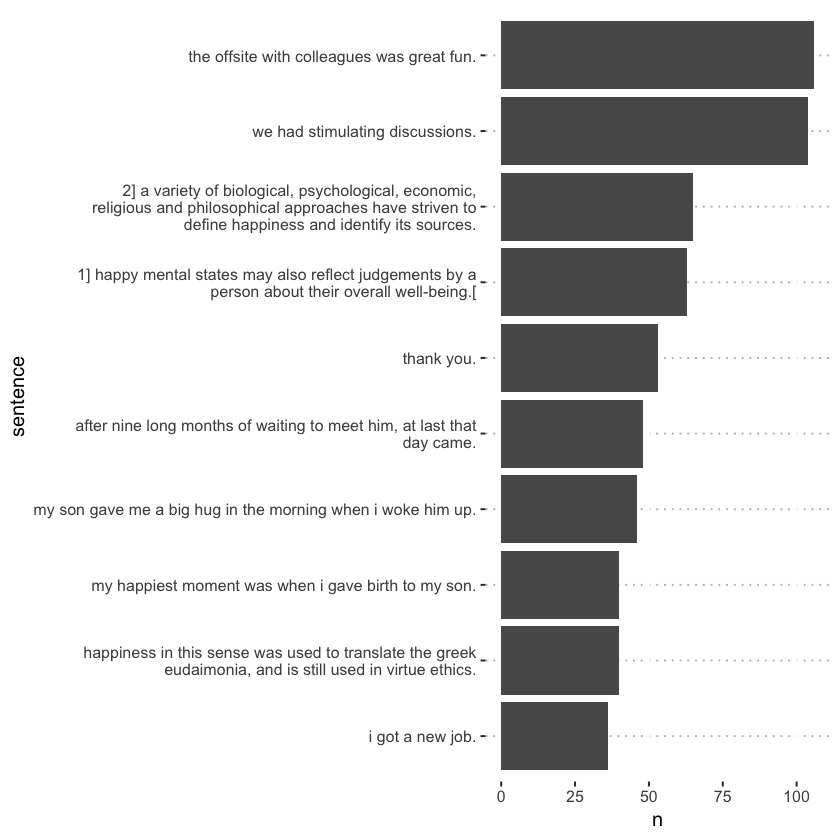

In [22]:
happy_df.tidy <- tidytext::unnest_tokens(happy_df, sentence, cleaned_hm, token = "sentences")
happy_df.count <- dplyr::count(happy_df.tidy, sentence, sort = TRUE) 
happy_df.count$sentence <- reorder(happy_df.count$sentence, happy_df.count$n)
happy_df.count <- head(happy_df.count, 10)

ggplot2::ggplot(happy_df.count, ggplot2::aes(x = sentence, y = n)) +
  ggplot2::geom_col() +
  ggplot2::coord_flip() +
  ggplot2::scale_x_discrete(labels = function(x) stringr::str_wrap(x, width = 60)) +
  ggpubr::theme_pubclean()

#  <span style='color:tomato'>  13. Tokenize and Visualize by N-Gram </span>


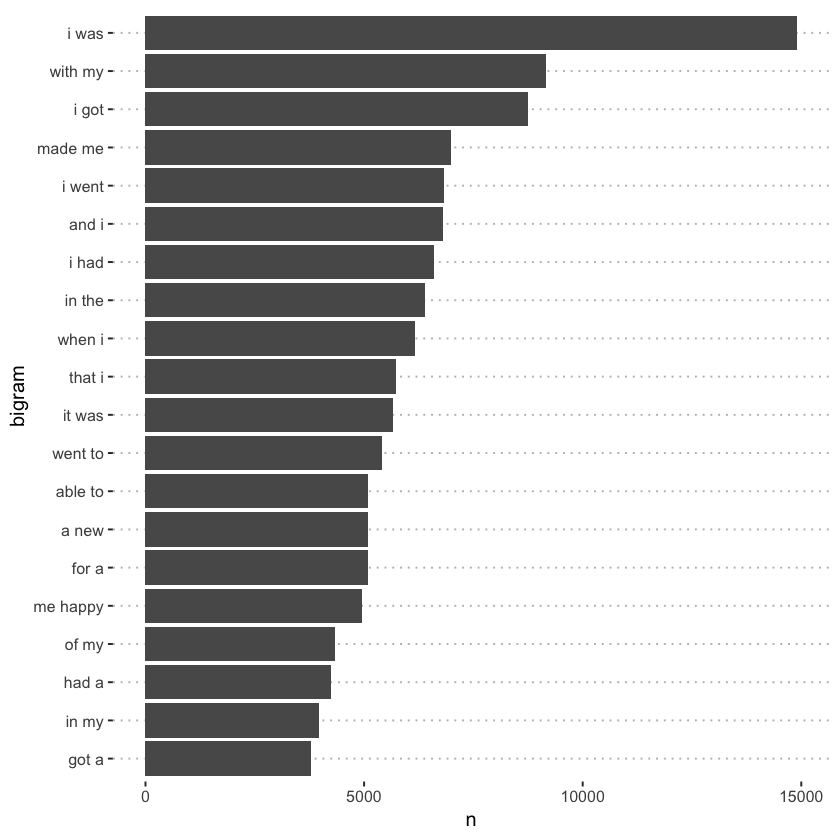

In [23]:
happy_df.tidy <- tidytext::unnest_tokens(happy_df, bigram, cleaned_hm, token = "ngrams", n = 2)
happy_df.count <- dplyr::count(happy_df.tidy, bigram, sort = TRUE) 
happy_df.count$bigram <- reorder(happy_df.count$bigram, happy_df.count$n)
happy_df.count <- head(happy_df.count, 20)

ggplot2::ggplot(happy_df.count, ggplot2::aes(x = bigram, y = n)) +
  ggplot2::geom_col() +
  ggplot2::coord_flip() +
  ggpubr::theme_pubclean()

#  <span style='color:tomato'>  14. Compute Word Pairs and Correlations </span>

Word pair combinations

In [24]:
word_pair <- widyr::pairwise_count(happy_df.clean, word, wid, sort = TRUE)
head(word_pair, 10)

Warning message:
“`distinct_()` is deprecated as of dplyr 0.7.0.
Please use `distinct()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

item1,item2,n
made,happy,2987
happy,made,2987
made,got,2393
got,made,2393
new,got,2312
got,new,2312
time,got,2304
got,time,2304
got,happy,2288
happy,got,2288


Word pair correlation

In [27]:
word_cor <- widyr::pairwise_cor(happy_df.clean[sample(nrow(happy_df.clean), 1000),], word, wid, sort = TRUE)
head(word_cor[which(word_cor$correlation != 1),], 15)

item1,item2,correlation
hunt,chicken,0.7066897
makes,happiest,0.7066897
sandwiches,spending,0.7066897
struggling,can,0.7066897
helping,sister,0.7066897
nearby,next,0.7066897
us,tremendous,0.7066897
beautiful,pretty,0.7066897
rome,pretty,0.7066897
inside,pretty,0.7066897


#  <span style='color:tomato'>  15. Visualize Correlations </span>

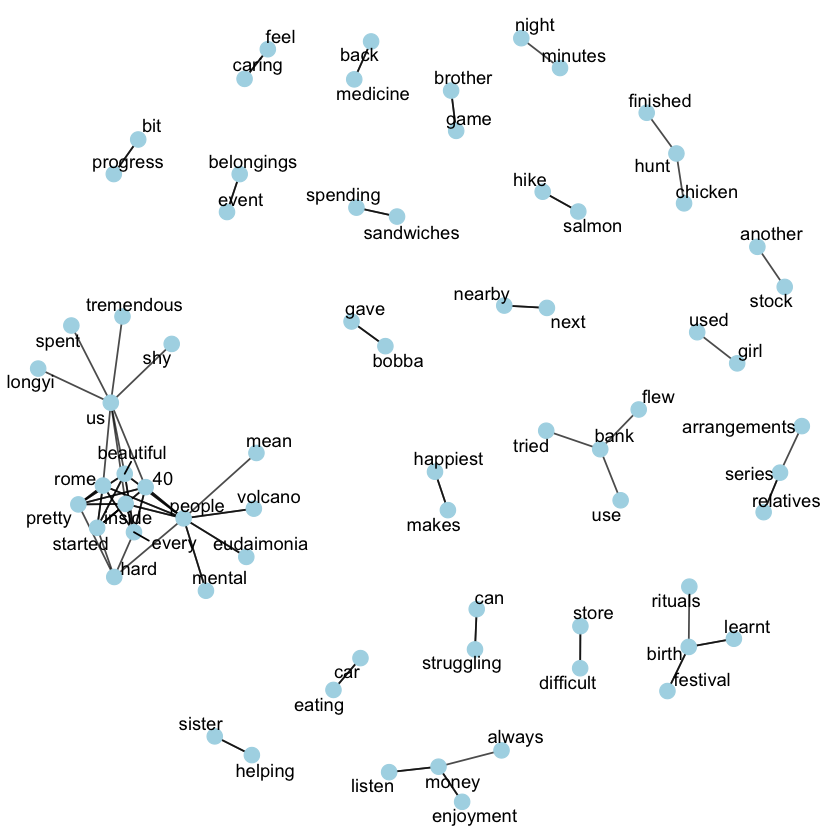

In [28]:
word_cor <- head(word_cor[which(word_cor$correlation != 1),],100)
g <- igraph::graph_from_data_frame(word_cor)

ggraph::ggraph(g, layout = "fr") +
  ggraph::geom_edge_link(ggplot2::aes(edge_alpha = correlation), show.legend = FALSE) +
  ggraph::geom_node_point(color = "lightblue", size = 4) +
  ggraph::geom_node_text(ggplot2::aes(label = name), repel = TRUE) +
  ggplot2::theme_void()